<a href="https://colab.research.google.com/github/jpedro-rod/ElementosFinitos/blob/main/Elementos_Finitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import itertools as it   #biblioteca com funções de permutação a serem usadas na interação da matriz de conectividade com a global

Formulação forte de um problema de condução de calor estacionário em uma placa:

$\nabla\cdot\vec{q} + G = 0 \;,\;\; \vec{q} = -k\nabla T$

Formulação fraca:

$∫_{\Omega}[\nabla\cdot\vec{q} + G]\cdot \omega(x,y) \;\; d\Omega = 0, ∀\omega \in U^0$

$∫_{\Omega}[\nabla\cdot\vec{q}\omega + G\omega] \;\; d\Omega = 0, ∀\omega \in U^0$

Pelo Teorema de Green (que assume a forma de integral por partes em 01 dimensão):

$\oint_{\Gamma}\omega\vec{q}\cdot\vec{n} \; d\Gamma - \int_{Ω} \nabla\omega\cdot\vec{q} \;\; dΩ + \int_{\Omega} G\omega \;\; dΩ= 0 \;\;\;\; (I)$

Reescrevendo a 1ª parcela em função das condições de contorno, ter-se-á:

$\oint_{\Gamma}\omega\vec{q}\cdot\vec{n} \; d\Gamma = \int_{\Gamma_q} \omega\vec{q}\cdot\vec{n} \; d\Gamma_q + \int_{\Gamma_T} \omega\vec{q}\cdot\vec{n} \; d\Gamma_T$

Sabe-se ainda que $\omega(x,y)=0$ em $\Gamma_T$ (para C.C. de Dirichlet), o que simplifica a equação oriunda do Teorema de Green:

$\oint_{\Gamma}\omega\vec{q}\cdot\vec{n} \; d\Gamma = \int_{\Gamma_q} \omega\vec{q}\cdot\vec{n} \; d\Gamma_q \;\;\;\; (II)$

Inserindo $II$ em $I$ e definindo $\overline{q}=\vec{q}\cdot\vec{n}$ finalmente:

$$ \int_{Ω} \nabla\omega\cdot(-k\nabla T) \;\; dΩ = \int_{\Gamma_q} \omega\overline{q} \;\; dΓ_q + \int_{\Omega} \omega G \;\; dΩ $$

Discretizando a fórmula fraca:

$$ T(x) = \sum_{i}^{\infty} N_i \cdot T_i \:,\;\; \omega(x) = \sum_{j}^{\infty} N_j \cdot w_j $$

$$ \int_{Ω} \sum_{i}^{\infty} \sum_{j}^{\infty} -B_j \omega_j \cdot k \cdot B_i T_i \;\; dΩ = \int_{\Gamma_q} \sum_{j}^{\infty} N_j \omega_j \cdot \overline{q} \;\; dΓ_q + \int_{\Omega} \sum_{j}^{\infty} N_j \omega_j \cdot G \;\; dΩ \:,\;\; B_n = \nabla N_n  $$

$N$ é o vetor de funções de interpolação (ou de forma). Índices diferentes representam vetores transpostos.

$$ \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{Ω} -B_j k B_i \cdot T_i \;\; dΩ = \sum_{j}^{\infty} \int_{\Gamma_q} N_j \cdot \overline{q} \;\; dΓ_q + \sum_{j}^{\infty} \int_{\Omega} N_j \cdot G \;\; dΩ $$

## Funções de forma (ou de interpolação)

In [2]:
#1ª ordem:
#N1 = [N11, N12]

def N11(x,X1,X2):
    return (X2-x)/(X2-X1)

def N12(x,X1,X2):
    return (x-X1)/(X2-X1)

def B11(x,X1,X2):
    return -1/(X2-X1)

def B12(x,X1,X2):
    return 1/(X2-X1)

#2ª ordem:
#N2 = [N21, N22, N23]

def N21(x,X1,X2,X3):
    return 2*(x-X2)*(x-X3)/(X3-X1)**2

def N22(x,X1,X2,X3):
    return (-4)*(x-X1)*(x-X3)/(X3-X1)**2

def N23(x,X1,X2,X3):
    return 2*(x-X1)*(x-X2)/(X3-X1)**2

# B2 = [B21, B22, B23]

def B21(x,X1,X2,X3):
    return 2*(2*x-(X2+X3))/(X3-X1)**2

def B22(x,X1,X2,X3):
    return (-4)*(2*x-(X1+X3))/(X3-X1)**2

def B23(x,X1,X2,X3):
    return 2*(2*x-(X1+X2))/(X3-X1)**2

## Condução de calor em barra delgada em regime permanente

Condução de calor numa barra fina e homogênea com extremidades a temperaturas fixas e submetida a geração de calor de comportamento linear:

$L = 4\:m = 4 \;,\;\; A = 1\:m^2 \;,\;\; K = 5\:W/(°Cm)$

$G(x) = \frac{50}{3}(x+2) \;,\;\; T(x=1) = 100°C \;,\;\; T(x=4) = 0$

$$ \sum_i^{\infty} \sum_j^{\infty} \int_{Ω} B_j k B_i \;\; dx \cdot T_i + \sum_j^{\infty} \int_{\Omega} N_j \;\; dx \cdot G = 0 $$

$$ K = \int_{x_o}^{x_f} B_j k B_i \;\; dx \:,\;\; B = \int_{x_o}^{x_f} N_j \;\; dx $$


### Integrando para obter matriz de rigidez e vetor de termos indepedentes

Matriz de conectividade: 
[[ 0.  1.  2.]
 [ 2.  3.  4.]
 [ 4.  5.  6.]
 [ 6.  7.  8.]
 [ 8.  9. 10.]]

Matrizes globais: 
K
[[ 44.44 -22.22   0.     0.     0.     0.     0.     0.     0.  ]
 [-22.22  38.89 -22.22   2.78   0.     0.     0.     0.     0.  ]
 [  0.   -22.22  44.44 -22.22   0.     0.     0.     0.     0.  ]
 [  0.     2.78 -22.22  38.89 -22.22   2.78   0.     0.     0.  ]
 [  0.     0.     0.   -22.22  44.44 -22.22   0.     0.     0.  ]
 [  0.     0.     0.     2.78 -22.22  38.89 -22.22   2.78   0.  ]
 [  0.     0.     0.     0.     0.   -22.22  44.44 -22.22   0.  ]
 [  0.     0.     0.     0.     0.     2.78 -22.22  38.89 -22.22]
 [  0.     0.     0.     0.     0.     0.     0.   -22.22  44.44]]
G
[-2200.22   289.78    26.      14.      30.      16.      34.      18.
    38.  ]

Nós (solução numérica): 
[100.    84.46  69.92  56.45  44.16  33.12  23.44  15.19   8.48   3.38
   0.  ]


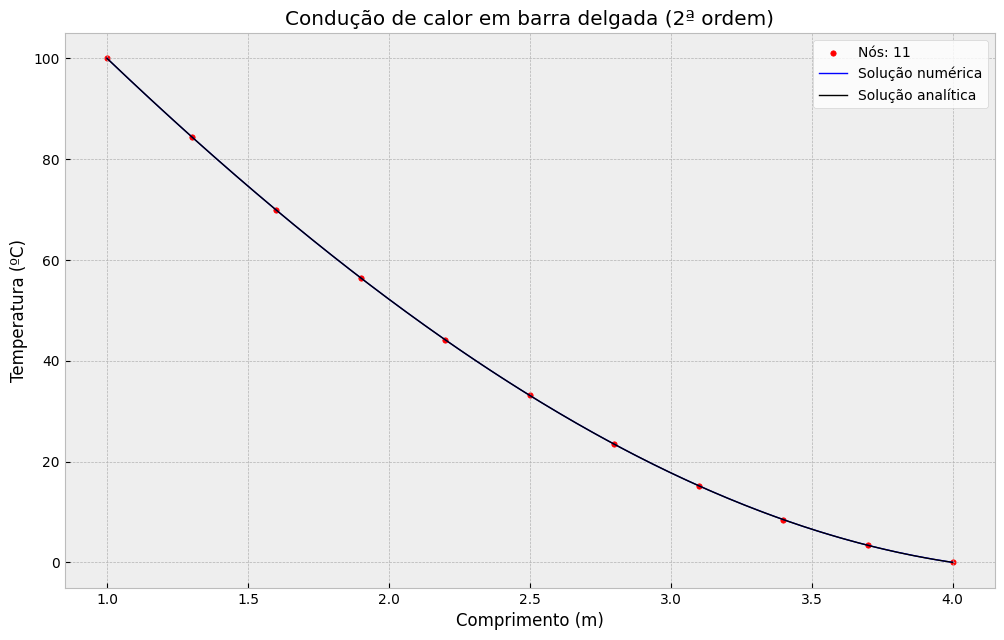

In [23]:
#Parâmetros Físicos

Xo = 1
Xf = 4
A = 1
k = 5
To = 100
Tf = 0

def S(x):
    return (50/3)*(x+2)

#Parâmetros numéricos############################

#OBS.: "ligacoes" se difere de nós pois se refere a pontos que ficam apenas nas fronteiras de cada elemento. "ligacoes" não abrange nós no interior de elementos, como nos de 2ª ordem.

ordemElemento = 2   #1 ou 2

ligacoes = 6                              
malha = np.linspace(Xo,Xf,ligacoes)

#################################################

##Produtos das funções de forma 1ª ordem
if ordemElemento == 1:

    ###Definindo nº de elementos e nós 
    nElementos = len(malha)-1
    nNos = nElementos+1
    
    nNosLocais = 2

    K11 = lambda x,X1,X2 : B11(x,X1,X2)*k*B11(x,X1,X2)
    K12 = lambda x,X1,X2 : B11(x,X1,X2)*k*B12(x,X1,X2)
    K21 = lambda x,X1,X2 : B12(x,X1,X2)*k*B11(x,X1,X2)
    K22 = lambda x,X1,X2 : B12(x,X1,X2)*k*B12(x,X1,X2)

    G1 = lambda x,X1,X2 : S(x)*N11(x,X1,X2)
    G2 = lambda x,X1,X2 : S(x)*N12(x,X1,X2)

    ###Função de integração a ser usada
    def INTEGRACAO_1(f,X1,X2):
        return sp.integrate.quad(f,X1,X2,(X1,X2))[0]

##Integrando e montando
    listaKe = np.empty((2,2,nElementos))
    listaGe = np.empty((1,2,nElementos))

    for e in range(0,nElementos):
        Ke = np.array([[INTEGRACAO_1(K11,malha[e],malha[e+1]),INTEGRACAO_1(K12,malha[e],malha[e+1])],
                    [INTEGRACAO_1(K21,malha[e],malha[e+1]),INTEGRACAO_1(K22,malha[e],malha[e+1])]])         

        Ge = np.array([[INTEGRACAO_1(G1,malha[e],malha[e+1]),INTEGRACAO_1(G2,malha[e],malha[e+1])]])

        listaKe[:,:,e] = Ke
        listaGe[:,:,e] = Ge


##Produtos das funções de forma 2ª ordem
elif ordemElemento == 2:
    
    ###Definindo nº de elementos e nós
    nElementos = int(len(malha)-1)
    nNos = nElementos + 1 + nElementos
    nNosLocais = 3

    ###MalhaPLT (Malha para plotagem (com os pontos intermediários de cada elemento))
    malhaPlot_e0 = np.array([malha[0],(malha[0]+malha[1])/2,malha[1]])   #1º elemento
    
    malhaPlot = np.empty(nNos-3)  #demais elementos

    for i in range(1,nElementos):

        nosElemento = np.array([(malha[i]+malha[i+1])/2, malha[i+1]])  
        malhaPlot[2*(i-1):2*(i)] = nosElemento

    malhaPLT = np.concatenate((malhaPlot_e0,malhaPlot))

    K11 = lambda x,X1,X2,X3 : B21(x,X1,X2,X3)*k*B21(x,X1,X2,X3)
    K12 = lambda x,X1,X2,X3 : B21(x,X1,X2,X3)*k*B22(x,X1,X2,X3)
    K13 = lambda x,X1,X2,X3 : B21(x,X1,X2,X3)*k*B23(x,X1,X2,X3)
    K21 = lambda x,X1,X2,X3 : B22(x,X1,X2,X3)*k*B21(x,X1,X2,X3)
    K22 = lambda x,X1,X2,X3 : B22(x,X1,X2,X3)*k*B22(x,X1,X2,X3)
    K23 = lambda x,X1,X2,X3 : B22(x,X1,X2,X3)*k*B23(x,X1,X2,X3)
    K31 = lambda x,X1,X2,X3 : B23(x,X1,X2,X3)*k*B21(x,X1,X2,X3)
    K32 = lambda x,X1,X2,X3 : B23(x,X1,X2,X3)*k*B22(x,X1,X2,X3)
    K33 = lambda x,X1,X2,X3 : B23(x,X1,X2,X3)*k*B23(x,X1,X2,X3)

    G1 = lambda x,X1,X2,X3 : S(x)*N21(x,X1,X2,X3)
    G2 = lambda x,X1,X2,X3 : S(x)*N22(x,X1,X2,X3)
    G3 = lambda x,X1,X2,X3 : S(x)*N23(x,X1,X2,X3)

    ###Função de integração a ser usada
    def INTEGRACAO_2(f,X1,X2,X3):
        return sp.integrate.quad(f,X1,X3,(X1,X2,X3))[0]

##Integrando e montando
    listaKe = np.empty((3,3,nElementos))
    listaGe = np.empty((1,3,nElementos))

    '''Há um if dentro do loop porque elementos de 2ª ordem podem terminar incompletos dependendo de como discretizarmos o domínio. Dessa forma é 
    necessário definir uma integração particular para o último elemento em que o integramos só até a metade'''
    
    indice_elemento = 0
    for e in range(0,nElementos):

        no_medio = (malha[e]+malha[e+1])/2
        Ke = np.array([[INTEGRACAO_2(K11,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(K12,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(K13,malha[e],no_medio,malha[e+1])],
                    [INTEGRACAO_2(K21,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(K22,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(K23,malha[e],no_medio,malha[e+1])],
                    [INTEGRACAO_2(K31,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(K32,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(K33,malha[e],no_medio,malha[e+1])]])
            
        Ge = np.array([[INTEGRACAO_2(G1,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(G2,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(G3,malha[e],no_medio,malha[e+1])]])

        listaKe[:,:,indice_elemento] = Ke
        listaGe[:,:,indice_elemento] = Ge
        indice_elemento = indice_elemento + 1

# Matriz de conectividade (IEN)

IEN = np.zeros((nElementos,nNosLocais))

##1ª ORDEM
if ordemElemento == 1:
        
    for elemento in range(nElementos):
        for noLocal in range(nNosLocais):
                
            IEN[elemento,noLocal] = elemento*(nNosLocais - 1) + noLocal

##2ª ORDEM
elif ordemElemento == 2:
    for elemento in range(nElementos):

        for noLocal in range(nNosLocais):

            IEN[elemento,noLocal] = elemento*(nNosLocais - 1) + noLocal

print("Matriz de conectividade: ")
print(IEN)

#Matrizes globais

Ks = np.zeros((nNos,nNos))    #Ks pois se refere a matriz global ainda em seu estado singular
Gs= np.zeros(nNos)

nMatrizesElementares = len(listaKe[0,0,:])

##1ª ORDEM
if ordemElemento == 1:

    ###Adicionando cada matriz elementar à matriz global
    for K_elementar_index in range(nMatrizesElementares):

        Kaux = np.zeros((nNos,nNos))

        ##Permutação da matriz global
        posicoes = list(it.product(IEN[K_elementar_index], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes = [(int(x), int(y)) for x,y in posicoes]             #O método retorna tuplas de floats, apenas passei os dados para int
                
        ##Permutação da matriz elementar
        posicoes_locais = list(it.product([0,1], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes_locais = [(int(x), int(y)) for x,y in posicoes_locais]
                
        #print(posicoes)
        #print(posicoes_locais)
        for i in range(len(posicoes)):
            posicao_global = posicoes[i] 
            posicao_local = posicoes_locais[i] + (K_elementar_index,)
            Kaux[posicao_global] = listaKe[posicao_local]
        #print(Kaux)
        Ks = Ks + Kaux
        
    ###Adicionando cada matriz elementar Ge à matriz global G
    for G_elementar_index in range(nMatrizesElementares):
        
        Gaux = np.zeros(nNos)

        for i in range(2):
            Gaux[G_elementar_index*(nNosLocais - 1) + i] = listaGe[:,i,G_elementar_index]
        #print(Gaux)
        Gs = Gs + Gaux
        
    #print("\nMatrizes globais singulares: ")
    #print("Ks")  
    #print(np.array_str(Ks, precision=2, suppress_small=True))
    #print("Gs")
    #print(np.array_str(Gs, precision=2, suppress_small=True))
    
##2ª ORDEM
elif ordemElemento == 2:

    ###Adicionando cada matriz elementar Ke à matriz global K
    for K_elementar_index in range(nMatrizesElementares):
        
        Kaux = np.zeros((nNos,nNos))

        ##Permutação da matriz global
        posicoes = list(it.product(IEN[K_elementar_index], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes = [(int(x), int(y)) for x,y in posicoes]             #O método retorna tuplas de floats, apenas passei os dados para int
        
        ##Permutação da matriz elementar
        posicoes_locais = list(it.product([0,1,2], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes_locais = [(int(x), int(y)) for x,y in posicoes_locais]
        
        #print(posicoes)
        #print(posicoes_locais)
        for i in range(len(posicoes)):
            posicao_global = posicoes[i]
            posicao_local = posicoes_locais[i] + (K_elementar_index,)
            Kaux[posicao_global] = listaKe[posicao_local]
        #print(Kaux)
        Ks = Ks + Kaux
        
    ###Adicionando cada matriz elementar Ge à matriz global G
    for G_elementar_index in range(nMatrizesElementares):
        
        Gaux = np.zeros(nNos)

        for i in range(3):
            Gaux[G_elementar_index*(nNosLocais - 1) + i] = listaGe[:,i,G_elementar_index]

        Gs = Gs + Gaux
    
    #print("\nMatrizes globais singulares: ")
    #print("Ks")  
    #print(np.array_str(Ks, precision=2, suppress_small=True))
    #print("Gs")
    #print(np.array_str(Gs, precision=2, suppress_small=True))
    
#Aplicação das condições de contorno na matriz e vetor independente:   K.T + G = 0

##K
###1º contorno
K = np.delete(Ks,obj=0,axis=0)   #eliminando linha
K = np.delete(K,obj=0, axis=1)   #eliminando coluna
###2º contorno
K = np.delete(K,obj=-1, axis=0)    #eliminando linha
K = np.delete(K,obj=-1, axis=1)   #eliminando coluna

##G
G = Gs[1:-1]
KLinhaEliminada = np.delete(Ks,obj=0,axis=0)
KLinhaEliminada = np.delete(KLinhaEliminada,obj=-1,axis=0)

for i in range(len(G)):

    G[i] = G[i] + To*KLinhaEliminada[i,0] + Tf*KLinhaEliminada[i,-1]

print("\nMatrizes globais: ")
print("K")  
print(np.array_str(K, precision=2, suppress_small=True))
print("G")
print(np.array_str(G, precision=2, suppress_small=True))

#Solucionando o sistema##########################

CampoTSemContorno = np.linalg.solve(K,-G)

BCo = np.array([To])
BCf = np.array([Tf])
Tnos = np.concatenate((BCo,CampoTSemContorno,BCf))

print("\nNós (solução numérica): ")
print(np.array_str(Tnos, precision=2, suppress_small=True))

#Gerando o campo de temperatura##################

def CampoTNumerico(malha,T):
    
    if ordemElemento == 1:
        np_e = 10   #nº de pontos que a interpolação calculará no interior de cada elemento

        #Separamos o 1º elemento do restante do loop pq cada elemento compartilha seu nó inicial com o fim do elemento anterior
        #Por isso inserimos um 1º elemento por completo e depois vamos completando os nós dos demais

        ##1º elemento
        Dom_interpol_e0 = np.linspace(malha[0],malha[1],np_e)
        interpol_e0 = np.array(N11(Dom_interpol_e0,malha[0],malha[0+1])*T[0] + N12(Dom_interpol_e0,malha[0],malha[0+1])*T[0+1])
        
        ##demais elementos
        Dom_interpol = np.empty((nElementos-1)*(np_e-1))
        interpol = np.empty((nElementos-1)*(np_e-1))
        
        for i in range(1, nElementos):

            Dom_interpol_e = np.linspace(malha[i], malha[i+1], np_e)
            npDom = len(Dom_interpol_e)
            
            S = N11(Dom_interpol_e,malha[i],malha[i+1])*T[i] + N12(Dom_interpol_e,malha[i],malha[i+1])*T[i+1]
             
            Dom_interpol[(npDom-1)*(i-1) : (npDom-1)*(i)] = Dom_interpol_e[1:]
            interpol[(npDom-1)*(i-1) : (npDom-1)*(i)] = S[1:]
        
        Dom_interpol = np.concatenate((Dom_interpol_e0, Dom_interpol))
        Campo_T = np.concatenate((interpol_e0, interpol))

        return Dom_interpol, Campo_T
    
    elif ordemElemento == 2:
        np_e = 10   #nº de pontos que a interpolação calculará no interior de cada elemento

        #Separamos o 1º elemento do restante do loop pq cada elemento compartilha seu nó inicial com o fim do elemento anterior
        #Por isso inserimos um 1º elemento por completo e depois vamos completando os nós dos demais

        ##1º elemento
        no_medio_e0 = (malha[0]+malha[1])/2
        Dom_interpol_e0 = np.linspace(malha[0],malha[1],np_e)
        interpol_e0 = np.array(N21(Dom_interpol_e0,malha[0],no_medio_e0,malha[1])*T[0] 
                             + N22(Dom_interpol_e0,malha[0],no_medio_e0,malha[1])*T[0+1] 
                             + N23(Dom_interpol_e0,malha[0],no_medio_e0,malha[1])*T[0+2])
        
        ##demais elementos
        Dom_interpol = np.empty((nElementos-1)*(np_e-1))
        interpol = np.empty((nElementos-1)*(np_e-1))

        for i in range(1,nElementos):

            no_medio = (malha[i]+malha[i+1])/2
            
            Dom_interpol_e = np.linspace(malha[i],malha[i+1],np_e)
            npDom = len(Dom_interpol_e)
            
            S = np.array(N21(Dom_interpol_e,malha[i],no_medio,malha[i+1])*T[2*i] 
                       + N22(Dom_interpol_e,malha[i],no_medio,malha[i+1])*T[2*i+1] 
                       + N23(Dom_interpol_e,malha[i],no_medio,malha[i+1])*T[2*i+2])

            Dom_interpol[(npDom-1)*(i-1) : (npDom-1)*i] = Dom_interpol_e[1:]
            interpol[(npDom-1)*(i-1) : (npDom-1)*i] = S[1:]

        Dom_interpol = np.concatenate((Dom_interpol_e0, Dom_interpol))
        Campo_T = np.concatenate((interpol_e0, interpol))

        return Dom_interpol, Campo_T

#Solução analítica

Dom_analitica = np.linspace(Xo,Xf,500)

def CampoTAnalitico(x):
    return (5/9)*x**3 + (10/3)*x**2 - (185/3)*x + 1420/9

#Exibindo as soluções

plt.style.use('bmh')

fig, (ax1) = plt.subplots(1, 1, sharey=True, sharex = True, figsize = (12,7.2))

if ordemElemento == 1:

    ax1.scatter(malha, Tnos, s=15, color='red', label=r'Nós: {}'.format(nNos))
    ax1.plot(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', linewidth=1.0, label=r'Solução numérica')
    #ax1.scatter(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', s=15, label=r'Solução numérica')
    ax1.plot(Dom(240), CampoTAnalitico(Dom(240)), color='black', linewidth=1.0, label=r'Solução analítica')
    ax1.set_title('Condução de calor em barra delgada (1ª ordem)')
    ax1.set_xlabel('Comprimento (m)')
    ax1.set_ylabel('Temperatura (ºC)')
    ax1.legend(loc='best',facecolor ='w')


elif ordemElemento == 2:

    ax1.scatter(malhaPLT, Tnos, s=15, color='red', label=r'Nós: {}'.format(nNos))
    ax1.plot(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', linewidth=1.0, label=r'Solução numérica')
    #ax1.scatter(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', s=15, label=r'Solução numérica')
    ax1.plot(Dom_analitica, CampoTAnalitico(Dom_analitica), color='black', linewidth=1.0, label=r'Solução analítica')
    ax1.set_title('Condução de calor em barra delgada (2ª ordem)')
    ax1.set_xlabel('Comprimento (m)')
    ax1.set_ylabel('Temperatura (ºC)')
    ax1.legend(loc='best',facecolor ='w')

### Usando matrizes prontas (para elementos de 1ª e 2ª ordem em malhas uniformes e estruturadas)

Matriz de conectividade: 
[[0. 1.]
 [1. 2.]
 [2. 3.]
 [3. 4.]
 [4. 5.]]

Matrizes globais: 
K
[[16.67 -8.33  0.    0.  ]
 [-8.33 16.67 -8.33  0.  ]
 [ 0.   -8.33 16.67 -8.33]
 [ 0.    0.   -8.33 16.67]]
G
[-797.33   42.     48.     54.  ]

Nós (solução numérica): 
[100.    69.92  44.16  23.44   8.48   0.  ]


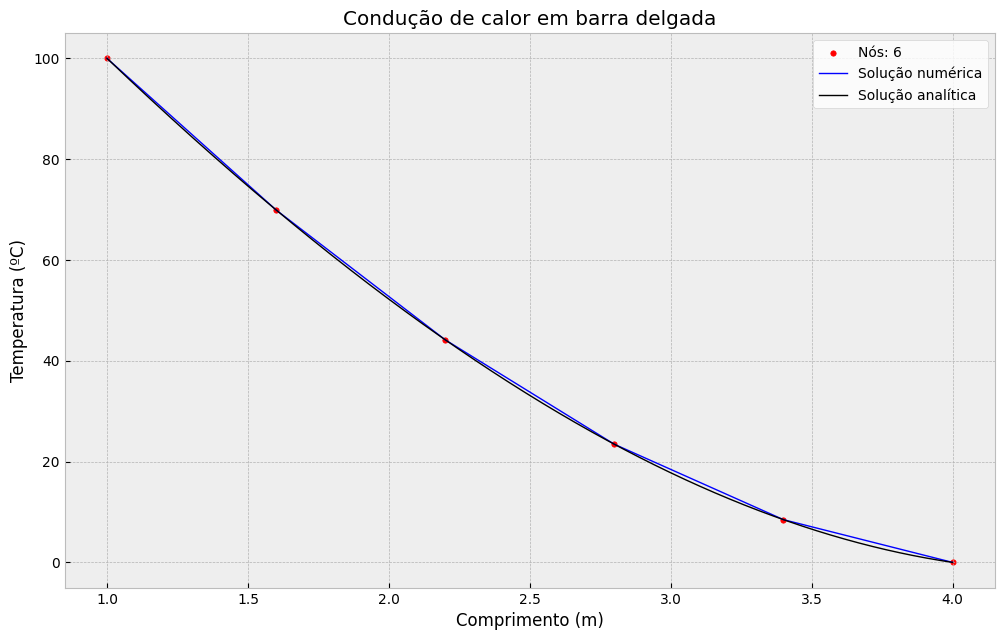

In [17]:
#Parâmetros Físicos#############################

Xo = 1
Xf = 4
A = 1
k = 5
To = 100
Tf = 0

def S(x):
    return (50/3)*(x+2)

#Parâmetros numéricos############################

#OBS.: "ligacoes" se difere de nós pois se refere a pontos que ficam apenas nas fronteiras de cada elemento. "ligacoes" não abrange nós no interior de elementos, como nos de 2ª ordem.

ordemElemento = 1   #1 ou 2

ligacoes = 6        
malha = np.linspace(Xo,Xf,ligacoes)

#################################################

##Produtos das funções de forma 1ª ordem#########
if ordemElemento == 1:

    ###Definindo nº de elementos e nós 
    nElementos = len(malha)-1
    nNos = nElementos+1
    h = malha[1] - malha[0]
    nNosLocais = 2

    G1 = lambda x,X1,X2 : S(x)*N11(x,X1,X2)
    G2 = lambda x,X1,X2 : S(x)*N12(x,X1,X2)

    ###Função de integração a ser usada
    def INTEGRACAO_1(f,X1,X2):
        return sp.integrate.quad(f,X1,X2,(X1,X2))[0]

##Matrizes elementares
    listaKe = np.ones((2,2,nElementos))
    listaGe = np.ones((1,2,nElementos))

    Ke = (k/h)*np.array([[1,-1],[-1,1]]) 

    for e in range(0,nElementos):      

        Ge = np.array([[INTEGRACAO_1(G1,malha[e],malha[e+1]),INTEGRACAO_1(G2,malha[e],malha[e+1])]])
    
        listaKe[:,:,e] = Ke
        listaGe[:,:,e] = Ge


##Produtos das funções de forma 2ª ordem#########
elif ordemElemento == 2:

    ###Definindo nº de elementos e nós
    nElementos = int(len(malha)-1)
    nNos = nElementos + 1 + nElementos
    h = malha[1] - malha[0]
    nNosLocais = 3

    ###MalhaPLT (Malha para plotagem (com os pontos intermediários de cada elemento))
    malhaPlot_e0 = np.array([malha[0],(malha[0]+malha[1])/2,malha[1]])   #1º elemento
    
    malhaPlot = np.empty(nNos-3)  #demais elementos

    for i in range(1,nElementos):
        
        nosElemento = np.array([(malha[i]+malha[i+1])/2, malha[i+1]])
        
        malhaPlot[2*(i-1):2*(i)] = nosElemento

    malhaPLT = np.concatenate((malhaPlot_e0,malhaPlot))

    G1 = lambda x,X1,X2,X3 : S(x)*N21(x,X1,X2,X3)
    G2 = lambda x,X1,X2,X3 : S(x)*N22(x,X1,X2,X3)
    G3 = lambda x,X1,X2,X3 : S(x)*N23(x,X1,X2,X3)

    ###Função de integração a ser usada
    def INTEGRACAO_2(f,X1,X2,X3):
        return sp.integrate.quad(f,X1,X3,(X1,X2,X3))[0]

##Matrizes elementares
    listaKe = np.empty((3,3,nElementos))
    listaGe = np.empty((1,3,nElementos))
    
    Ke = (k/h)*np.array([[7/3,-8/3,1/3],[-8/3,16/3,-8/3],[1/3,-8/3,7/3]])

    indice_elemento = 0
    for e in range(0,nElementos):

        no_medio = (malha[e]+malha[e+1])/2
        Ge = np.array([[INTEGRACAO_2(G1,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(G2,malha[e],no_medio,malha[e+1]),INTEGRACAO_2(G3,malha[e],no_medio,malha[e+1])]])

        listaKe[:,:,indice_elemento] = Ke
        listaGe[:,:,indice_elemento] = Ge
        indice_elemento = indice_elemento + 1

#Matriz de conectividade (IEN)###################

IEN = np.zeros((nElementos,nNosLocais))

##1ª ORDEM
if ordemElemento == 1:
        
    for elemento in range(nElementos):
        for noLocal in range(nNosLocais):
                
            IEN[elemento,noLocal] = elemento*(nNosLocais - 1) + noLocal

##2ª ORDEM
elif ordemElemento == 2:
    for elemento in range(nElementos):

        for noLocal in range(nNosLocais):

            IEN[elemento,noLocal] = elemento*(nNosLocais - 1) + noLocal

print("Matriz de conectividade: ")
print(IEN)

#Matrizes globais#################################

Ks = np.zeros((nNos,nNos))    #Ks pois se refere a matriz global ainda em seu estado singular
Gs= np.zeros(nNos)

nMatrizesElementares = len(listaKe[0,0,:])

##1ª ORDEM
if ordemElemento == 1:

    ###Adicionando cada matriz elementar à matriz global
    for K_elementar_index in range(nMatrizesElementares):

        Kaux = np.zeros((nNos,nNos))

        ##Permutação da matriz global
        posicoes = list(it.product(IEN[K_elementar_index], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes = [(int(x), int(y)) for x,y in posicoes]             #O método retorna tuplas de floats, apenas passei os dados para int
                
        ##Permutação da matriz elementar
        posicoes_locais = list(it.product([0,1], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes_locais = [(int(x), int(y)) for x,y in posicoes_locais]
                
        #print(posicoes)
        #print(posicoes_locais)
        for i in range(len(posicoes)):
            posicao_global = posicoes[i] 
            Kaux[posicao_global] = Ke[posicoes_locais[i]]
        #print(Kaux)
        Ks = Ks + Kaux
        
    ###Adicionando cada matriz elementar Ge à matriz global G
    for G_elementar_index in range(nMatrizesElementares):
        
        Gaux = np.zeros(nNos)

        for i in range(2):
            Gaux[G_elementar_index*(nNosLocais - 1) + i] = listaGe[:,i,G_elementar_index]
        #print(Gaux)
        Gs = Gs + Gaux
        
    #print("\nMatrizes globais singulares: ")
    #print("Ks")  
    #print(np.array_str(Ks, precision=2, suppress_small=True))
    #print("Gs")
    #print(np.array_str(Gs, precision=2, suppress_small=True))
    
##2ª ORDEM
elif ordemElemento == 2:

    ###Adicionando cada matriz elementar Ke à matriz global K
    for K_elementar_index in range(nMatrizesElementares):
        
        Kaux = np.zeros((nNos,nNos))

        ##Permutação da matriz global
        posicoes = list(it.product(IEN[K_elementar_index], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes = [(int(x), int(y)) for x,y in posicoes]             #O método retorna tuplas de floats, apenas passei os dados para int
        
        ##Permutação da matriz elementar
        posicoes_locais = list(it.product([0,1,2], repeat=2))   #Retorna tuplas de permutações da lista. O parâmetro r define quantos elementos da lista permutar por vez
        posicoes_locais = [(int(x), int(y)) for x,y in posicoes_locais]

        #print(posicoes)
        #print(posicoes_locais)
        for i in range(len(posicoes)):
            posicao_global = posicoes[i]
            Kaux[posicao_global] = Ke[posicoes_locais[i]]
        #print(Kaux)
        Ks = Ks + Kaux
        
    ###Adicionando cada matriz elementar Ge à matriz global G
    for G_elementar_index in range(nMatrizesElementares):
        
        Gaux = np.zeros(nNos)

        for i in range(3):
            Gaux[G_elementar_index*(nNosLocais - 1) + i] = listaGe[:,i,G_elementar_index]

        Gs = Gs + Gaux
    
    #print("\nMatrizes globais singulares: ")
    #print("Ks")  
    #print(np.array_str(Ks, precision=2, suppress_small=True))
    #print("Gs")
    #print(np.array_str(Gs, precision=2, suppress_small=True))
    
#Aplicação das condições de contorno na matriz e vetor independente:   K.T + G = 0

##K
###1º contorno
K = np.delete(Ks,obj=0,axis=0)   #eliminando linha
K = np.delete(K,obj=0, axis=1)   #eliminando coluna
###2º contorno
K = np.delete(K,obj=-1, axis=0)    #eliminando linha
K = np.delete(K,obj=-1, axis=1)   #eliminando coluna

##G
G = Gs[1:-1]
KLinhaEliminada = np.delete(Ks,obj=0,axis=0)
KLinhaEliminada = np.delete(KLinhaEliminada,obj=-1,axis=0)

for i in range(len(G)):

    G[i] = G[i] + To*KLinhaEliminada[i,0] + Tf*KLinhaEliminada[i,-1]

print("\nMatrizes globais: ")
print("K")  
print(np.array_str(K, precision=2, suppress_small=True))
print("G")
print(np.array_str(G, precision=2, suppress_small=True))

#Solucionando o sistema###########################

CampoTSemContorno = np.linalg.solve(K,-G)

BCo = np.array([To])
BCf = np.array([Tf])
Tnos = np.concatenate((BCo,CampoTSemContorno,BCf))

print("\nNós (solução numérica): ")
print(np.array_str(Tnos, precision=2, suppress_small=True))

#Gerando o campo de temperatura##################

def CampoTNumerico(malha,T):
    
    if ordemElemento == 1:
        np_e = 10   #nº de pontos que a interpolação calculará no interior de cada elemento

        #Separamos o 1º elemento do restante do loop pq cada elemento compartilha seu nó inicial com o fim do elemento anterior
        #Por isso inserimos um 1º elemento por completo e depois vamos completando os nós dos demais

        ##1º elemento
        Dom_interpol_e0 = np.linspace(malha[0],malha[1],np_e)
        interpol_e0 = np.array(N11(Dom_interpol_e0,malha[0],malha[0+1])*T[0] + N12(Dom_interpol_e0,malha[0],malha[0+1])*T[0+1])
        
        ##demais elementos
        Dom_interpol = np.empty((nElementos-1)*(np_e-1))
        interpol = np.empty((nElementos-1)*(np_e-1))
        
        for i in range(1, nElementos):

            Dom_interpol_e = np.linspace(malha[i], malha[i+1], np_e)
            npDom = len(Dom_interpol_e)
            
            S = N11(Dom_interpol_e,malha[i],malha[i+1])*T[i] + N12(Dom_interpol_e,malha[i],malha[i+1])*T[i+1]
             
            Dom_interpol[(npDom-1)*(i-1) : (npDom-1)*(i)] = Dom_interpol_e[1:]
            interpol[(npDom-1)*(i-1) : (npDom-1)*(i)] = S[1:]
        
        Dom_interpol = np.concatenate((Dom_interpol_e0, Dom_interpol))
        Campo_T = np.concatenate((interpol_e0, interpol))

        return Dom_interpol, Campo_T
    
    elif ordemElemento == 2:
        np_e = 10   #nº de pontos que a interpolação calculará no interior de cada elemento

        #Separamos o 1º elemento do restante do loop pq cada elemento compartilha seu nó inicial com o fim do elemento anterior
        #Por isso inserimos um 1º elemento por completo e depois vamos completando os nós dos demais

        ##1º elemento
        no_medio_e0 = (malha[0]+malha[1])/2
        Dom_interpol_e0 = np.linspace(malha[0],malha[1],np_e)
        interpol_e0 = np.array(N21(Dom_interpol_e0,malha[0],no_medio_e0,malha[1])*T[0] 
                             + N22(Dom_interpol_e0,malha[0],no_medio_e0,malha[1])*T[0+1] 
                             + N23(Dom_interpol_e0,malha[0],no_medio_e0,malha[1])*T[0+2])
        
        ##demais elementos
        Dom_interpol = np.empty((nElementos-1)*(np_e-1))
        interpol = np.empty((nElementos-1)*(np_e-1))

        for i in range(1,nElementos):

            no_medio = (malha[i]+malha[i+1])/2
            
            Dom_interpol_e = np.linspace(malha[i],malha[i+1],np_e)
            npDom = len(Dom_interpol_e)
            
            S = np.array(N21(Dom_interpol_e,malha[i],no_medio,malha[i+1])*T[2*i] 
                       + N22(Dom_interpol_e,malha[i],no_medio,malha[i+1])*T[2*i+1] 
                       + N23(Dom_interpol_e,malha[i],no_medio,malha[i+1])*T[2*i+2])

            Dom_interpol[(npDom-1)*(i-1) : (npDom-1)*i] = Dom_interpol_e[1:]
            interpol[(npDom-1)*(i-1) : (npDom-1)*i] = S[1:]

        Dom_interpol = np.concatenate((Dom_interpol_e0, Dom_interpol))
        Campo_T = np.concatenate((interpol_e0, interpol))

        return Dom_interpol, Campo_T

#Solução analítica

Dom_analitica = np.linspace(Xo,Xf,500)

def CampoTAnalitico(x):
    return (5/9)*x**3 + (10/3)*x**2 - (185/3)*x + 1420/9

#Exibindo as soluções

plt.style.use('bmh')

fig, (ax1) = plt.subplots(1, 1, sharey=True, sharex = True, figsize = (12,7.2))

if ordemElemento == 1:

    ax1.scatter(malha, Tnos, s=15, color='red', label=r'Nós: {}'.format(nNos))
    ax1.plot(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', linewidth=1.0, label=r'Solução numérica')
    #ax1.scatter(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', s=15, label=r'Solução numérica')
    ax1.plot(Dom(240), CampoTAnalitico(Dom(240)), color='black', linewidth=1.0, label=r'Solução analítica')
    ax1.set_title('Condução de calor em barra delgada (1ª ordem)')
    ax1.set_xlabel('Comprimento (m)')
    ax1.set_ylabel('Temperatura (ºC)')
    ax1.legend(loc='best',facecolor ='w')


elif ordemElemento == 2:

    ax1.scatter(malhaPLT, Tnos, s=15, color='red', label=r'Nós: {}'.format(nNos))
    ax1.plot(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', linewidth=1.0, label=r'Solução numérica')
    #ax1.scatter(CampoTNumerico(malha,Tnos)[0], CampoTNumerico(malha,Tnos)[1], color='blue', s=15, label=r'Solução numérica')
    ax1.plot(Dom_analitica, CampoTAnalitico(Dom_analitica), color='black', linewidth=1.0, label=r'Solução analítica')
    ax1.set_title('Condução de calor em barra delgada (2ª ordem')
    ax1.set_xlabel('Comprimento (m)')
    ax1.set_ylabel('Temperatura (ºC)')
    ax1.legend(loc='best',facecolor ='w')


## Condução de calor em barra delgada em regime transiente

## Rascunho

In [6]:

        '''
        n = int(math.ceil(len(x)/nElementos))
        x_sliced = np.empty((nElementos,n))

        for i in range(nElementos):

            x_sliced[i] = x[(n-1)*i:(n-1)*i+n]
        
        print(malha)
        print(x_sliced)
        Campo_T_Elemento0 = np.empty(n)

        S0 = np.array(N11(x_sliced[0,:],malha[0],malha[0+1])*T[0] + N12(x_sliced[0,:],malha[0],malha[0+1])*T[0+1])
        Campo_T_Elemento0[0:n] = S0

        Campo_T = np.empty(len(x)-n)

        S = np.empty(len(x_sliced[0,1:]))

        for e in range(1,nElementos):

            S = N11(x_sliced[e,1:],malha[e],malha[e+1])*T[e] + N12(x_sliced[e,1:],malha[e],malha[e+1])*T[e+1]
            
            Campo_T[(n-1)*(e-1):(n-1)*((e-1)+1)] = S

        Campo_T = np.concatenate((Campo_T_Elemento0, Campo_T))
        '''
        '''
    if ordemElemento == 1:

        n = int(len(x)/nElementos)
        x_sliced = np.empty((nElementos,n))
        print(malha)
        print(x_sliced)
        for i in range(nElementos):

            x_sliced[i] = x[n*i:n*i+n]
        
        Campo_T = np.empty(n*nElementos)
        S = np.empty(n)
        
        for e in range(0,nElementos):

            S = N11(x_sliced[e],malha[e],malha[e+1])*T[e] + N12(x_sliced[e],malha[e],malha[e+1])*T[e+1]

            Campo_T[n*e:n*(e+1)] = S

        return Campo_T
        '''

'\n    if ordemElemento == 1:\n\nn = int(len(x)/nElementos)\nx_sliced = np.empty((nElementos,n))\nprint(malha)\nprint(x_sliced)\nfor i in range(nElementos):\n\n    x_sliced[i] = x[n*i:n*i+n]\n\nCampo_T = np.empty(n*nElementos)\nS = np.empty(n)\n\nfor e in range(0,nElementos):\n\n    S = N11(x_sliced[e],malha[e],malha[e+1])*T[e] + N12(x_sliced[e],malha[e],malha[e+1])*T[e+1]\n\n    Campo_T[n*e:n*(e+1)] = S\n\nreturn Campo_T\n'